In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [25]:
df = pd.read_excel('testing.xlsx')

In [26]:
df.head()

,Bank,Year,Deposits,Loans and advances,Investments,NPA,NPL %,Profit
0,Prime Bank,2013,201907.0,153589.0,56940.0,-48317.961281,5.09,1829.0
1,AB Bank,2013,161846.0,28676.0,28676.0,-133169.994029,3.37,1011.0
2,Dhaka Bank,2013,115981.0,99596.0,18757.0,-16384.964363,4.15,1927.0
3,DBBL,2013,145230.1,106422.8,17441.9,-38807.271421,3.90,2000.8
4,City Bank,2013,107497.0,89879.0,26492.0,-17617.932275,8.10,911.0


In [27]:
df1=df[["Bank", "Year"]]
df1=df1[(df1.Year != 2013)]
df1.reset_index(inplace=True)
df1=df1.drop(columns=["index"])

In [28]:
np_df=np.empty([len(df["Bank"].unique())*(len(df["Year"].unique())-1), df.shape[1]-1], dtype=object) 
np_df1=df1.to_numpy()

In [29]:
df2013=df[(df.Year == 2013)]
df2014=df[(df.Year == 2014)]
df2015=df[(df.Year == 2015)]
df2016=df[(df.Year == 2016)]
df2017=df[(df.Year == 2017)]
df2018=df[(df.Year == 2018)]

np_df2013=df2013.to_numpy()
np_df2014=df2014.to_numpy()
np_df2015=df2015.to_numpy()
np_df2016=df2016.to_numpy()
np_df2017=df2017.to_numpy()
np_df2018=df2018.to_numpy()

In [30]:
def change(x, y):
    if(x != 0):
        i=((y-x)*100.0)/x
        if(i>15.0):
            return 1
        elif(i<=15.0 and i>7.5):
            return 2
        elif(i<=7.5 and i>-7.5):
            return 3
        elif(i<=-7.5 and i>-15):
            return 4
        elif(i<-15.0):
            return 5
    else:
        return 1

In [31]:
"""def change(x, y):
    if(x != 0):
        i=((y-x)*100.0)/x
        if(i>0==0):
            return 1
        else:
            return 0
    else:
        return 0"""

'def change(x, y):\n    if(x != 0):\n        i=((y-x)*100.0)/x\n        if(i>0==0):\n            return 1\n        else:\n            return 0\n    else:\n        return 0'

In [32]:
#2014
for i in range(0, len(df["Bank"].unique())):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(np_df2013[i, 2], np_df2014[i, 2])
    np_df[i, 2] = change(np_df2013[i, 3], np_df2014[i, 3])
    np_df[i, 3] = change(np_df2013[i, 4], np_df2014[i, 4])
    np_df[i, 4] = change(np_df2013[i, 5], np_df2014[i, 5])
    np_df[i, 5] = change(np_df2013[i, 6], np_df2014[i, 6])
    np_df[i, 6] = change(np_df2013[i, 7], np_df2014[i, 7])
 

    
#2015
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2]]) , mean([np_df2014[c, 2], np_df2015[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3]]) , mean([np_df2014[c, 3], np_df2015[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4]]) , mean([np_df2014[c, 4], np_df2015[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5]]) , mean([np_df2014[c, 5], np_df2015[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6]]) , mean([np_df2014[c, 6], np_df2015[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7]]) , mean([np_df2014[c, 7], np_df2015[c, 7]]))
    c=c+1
    
    
    
#2016
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2], np_df2015[c, 2]]), 
                         mean([np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3], np_df2015[c, 3]]),
                         mean([np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4], np_df2015[c, 4]]), 
                         mean([np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5], np_df2015[c, 5]]), 
                         mean([np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6], np_df2015[c, 6]]), 
                         mean([np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7], np_df2015[c, 7]]), 
                         mean([np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7]]))
    c=c+1
    
    
    
    
#2017
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2]]), 
                         mean([np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2], np_df2017[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3]]),
                         mean([np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3], np_df2017[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4]]), 
                         mean([np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4], np_df2017[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5]]), 
                         mean([np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5], np_df2017[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6]]), 
                         mean([np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6], np_df2017[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7]]), 
                         mean([np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7], np_df2017[c, 7]]))
    c=c+1
    
    
    
#2018
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2], np_df2017[c, 2]]), 
                         mean([np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2], np_df2017[c, 2], np_df2018[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3], np_df2017[c, 3]]),
                         mean([np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3], np_df2017[c, 3], np_df2018[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4], np_df2017[c, 4]]), 
                         mean([np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4], np_df2017[c, 4], np_df2018[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5], np_df2017[c, 5]]), 
                         mean([np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5], np_df2017[c, 5], np_df2018[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6], np_df2017[c, 6]]), 
                         mean([np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6], np_df2017[c, 6], np_df2018[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7], np_df2017[c, 7]]), 
                         mean([np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7], np_df2017[c, 7], np_df2018[c, 7]]))
    c=c+1

In [33]:
df = pd.DataFrame(data=np_df,  columns=["Bank Year", "Deposits", "Loans and advances", "Investments", "NPA", "NPL %", "Profit"])

In [34]:
df.head()

,Bank Year,Deposits,Loans and advances,Investments,NPA,NPL %,Profit
0,Prime Bank 2014,3,3,1,1,1,1
1,AB Bank 2014,1,1,3,5,2,1
2,Dhaka Bank 2014,2,3,3,1,1,3
3,DBBL 2014,2,1,2,2,2,2
4,City Bank 2014,2,1,2,5,5,1


In [35]:
features = ["Deposits", "Loans and advances", "Investments", "NPA", "NPL %"]
X = pd.get_dummies(df[features])
y = df.Profit.copy()
y=y.astype('int')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [37]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


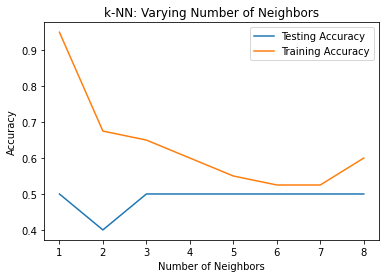

In [38]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
depth = np.arange(1, 9)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))
for i, k in enumerate(depth):
    ran = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=1)
    ran.fit(X_train, y_train)
    train_accuracy[i] = ran.score(X_train, y_train)
    test_accuracy[i] = ran.score(X_test, y_test)

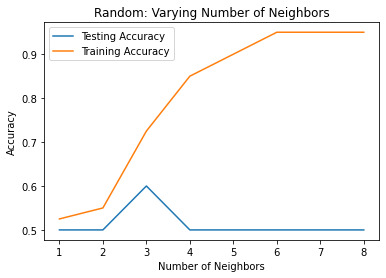

In [41]:
plt.title('Random: Varying Number of Neighbors')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
ran = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
ran.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 4,193
Trainable params: 4,193
Non-trainable params: 0
____________________________________________________

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
40/40 [==============================] - 1s 26ms/step - loss: 1.4056 - accuracy: 0.0000e+00
Epoch 2/150
40/40 [==============================] - 0s 1ms/step - loss: 1.0965 - accuracy: 0.0000e+00
Epoch 3/150
40/40 [==============================] - 0s 1ms/step - loss: 0.9072 - accuracy: 0.0000e+00
Epoch 4/150
40/40 [==============================] - 0s 1ms/step - loss: 0.8017 - accuracy: 0.0750
Epoch 5/150
40/40 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.1500
Epoch 6/150
40/40 [==============================] - 0s 914us/step - loss: 0.6901 - accuracy: 0.2500
Epoch 7/150
40/40 [==============================] - 0s 871us/step - loss: 0.6594 - accuracy: 0.2500
Epoch 8/150
40/40 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.2750
Epoch 9/150
40/40 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.3000
Epoch 10/150
40/40 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy:

40/40 [==============================] - 0s 773us/step - loss: -9979.1885 - accuracy: 0.3000
Epoch 82/150
40/40 [==============================] - 0s 571us/step - loss: -11264.3169 - accuracy: 0.3000
Epoch 83/150
40/40 [==============================] - 0s 658us/step - loss: -12891.3595 - accuracy: 0.3000
Epoch 84/150
40/40 [==============================] - 0s 775us/step - loss: -14358.2021 - accuracy: 0.3000
Epoch 85/150
40/40 [==============================] - 0s 696us/step - loss: -16305.8931 - accuracy: 0.3000
Epoch 86/150
40/40 [==============================] - 0s 549us/step - loss: -18125.3059 - accuracy: 0.3000
Epoch 87/150
40/40 [==============================] - 0s 930us/step - loss: -20145.8345 - accuracy: 0.3000
Epoch 88/150
40/40 [==============================] - 0s 816us/step - loss: -22700.9272 - accuracy: 0.3000
Epoch 89/150
40/40 [==============================] - 0s 836us/step - loss: -25059.2334 - accuracy: 0.3000
Epoch 90/150
40/40 [==============================]

In [47]:
print("K Neighbors ",knn.score(X_test, y_test))
print("Random Forest Score: ",ran.score(X_test, y_test))
print("GaussianNB Score: ",gnb.score(X_test, y_test))

K Neighbors  0.5
Random Forest Score:  0.6
GaussianNB Score:  0.5


In [48]:
print("NN Score: ",model.evaluate(X_test, y_test))

10/10 [==============================] - 0s 23ms/step
NN Score:  [-1841167.25, 0.30000001192092896]
